In [4]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd
from ppp_aging.ppp_model import *

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import scienceplots

plt.style.use(["nature", "no-latex"])

/tmp/ipykernel_16234/4284081116.py:36: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [6]:
pkls = {Path(i.name).stem: str(i) for i in Path("./1_regression_models").glob("*.pkl")}
pkls

{'single_logit_sig': '1_regression_models/single_logit_sig.pkl',
 'single_surivival_sig': '1_regression_models/single_surivival_sig.pkl',
 'single_surivival_sig_multivar_res_sig_risk_factors': '1_regression_models/single_surivival_sig_multivar_res_sig_risk_factors.pkl',
 'single_logit_sig_risk_factors': '1_regression_models/single_logit_sig_risk_factors.pkl',
 'risk_factors': '1_regression_models/risk_factors.pkl',
 'PRS_age_sex': '1_regression_models/PRS_age_sex.pkl',
 'multivar_merge_logit_surivival': '1_regression_models/multivar_merge_logit_surivival.pkl',
 'single_surivival_sig_risk_factors': '1_regression_models/single_surivival_sig_risk_factors.pkl',
 'single_logit_sig_multivar_res_sig': '1_regression_models/single_logit_sig_multivar_res_sig.pkl',
 'single_logit_sig_risk_factors_PRS': '1_regression_models/single_logit_sig_risk_factors_PRS.pkl',
 'single_surivival_sig_multivar_res_sig': '1_regression_models/single_surivival_sig_multivar_res_sig.pkl',
 'age_sex': '1_regression_mod

In [7]:
import cuml

result_dict = pd.read_pickle(pkls["single_surivival_sig_risk_factors_PRS"])

In [10]:
auc_dict = [[k, result_dict[k]["test_metrics"]["test_auc"]] for k in result_dict.keys()]
auc_df = pd.DataFrame(auc_dict, columns=["feature", "auc"])
# auc_df.to_csv("auc_df.csv", index=False)

- LR: Logistic Regression
- AS: Age_Sex
- RF: Risk Factors
- COX: Cox Regression
- P_cutoff: 按照P值进行过率后剩下的蛋白在对应方法的多元回归显著的结果



In [12]:
auc_df = pd.read_csv("auc_df.csv")
auc_df

,feature,auc,combination
0,age_sex,0.716839,AS
1,PRS_age_sex,0.743611,PRS + AS
2,risk_factors,0.748043,RF
3,PRS_risk_factors,0.764749,PRS + RF
4,single_surivival_sig_multivar_res_sig,0.719989,COX(P_cutoff)
5,single_surivival_sig_multivar_res_sig_risk_fac...,0.774452,COX(P_cutoff + RF
6,single_surivival_sig_multivar_res_sig_risk_fac...,0.785920,COX(P_cutoff) + RF + PRS
7,single_logit_sig_multivar_res_sig,0.758299,LR(P_cutoff)
8,multivar_merge_logit_surivival,0.758178,LR(P_cutoff) + COX(P_cutoff)
9,single_logit_sig_multivar_res_sig_risk_factors,0.780404,LR(P_cutoff) + RF


/tmp/ipykernel_16234/301147104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


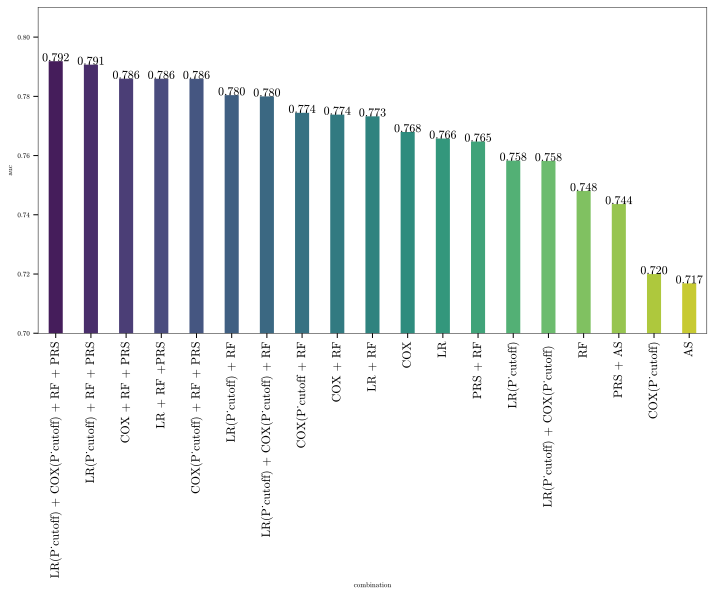

: 

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))


plt_data = auc_df.sort_values("auc", ascending=False)
sns.barplot(
    data=plt_data,
    x="combination",
    y="auc",
    ax=ax,
    gap=0.5,
    palette="viridis",
)
ax.set_ylim(0.7, 0.81)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)

for patch in ax.patches:
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        patch.get_height(),
        f"{patch.get_height():.3f}",
        ha="center",
        fontsize=12,
    )
fig.savefig("1.1_ml_compared.png", dpi=400, bbox_inches="tight")

In [32]:
from sklearn.metrics import f1_score

# from torch import

res = result_dict["age_sex"]


train_mean = res["train_data"]["incident_cad_pred"].mean()
train_std = res["train_data"]["incident_cad_pred"].std()

test_data = res["test_data"]
# f1_score
# y_true = np.eye(2)[test_data["incident_cad"].values]
y_true = test_data["incident_cad"].values
# y_pred_zscore = (test_data["incident_cad_pred"].values - train_mean) / train_std

y_pred = test_data["incident_cad_pred"].values
# y_true = np.F.one_hot(tensor, num_classes=0)

# f1_score(test["incident_cad"], test["incident_cad_pred"].values, average="weighted")

In [52]:
import torch
from torchmetrics.classification import SpecificityAtSensitivity


y_pred = torch.tensor(y_pred)
y_true = torch.tensor(y_true)

metric = SpecificityAtSensitivity(min_sensitivity=1, task="binary")
metric(y_pred, y_true)

/tmp/ipykernel_20839/2948767098.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(y_pred)
/tmp/ipykernel_20839/2948767098.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true)


(tensor(0.0176), tensor(0.4954, dtype=torch.float64))

In [49]:
from torchmetrics.classification import ConfusionMatrix

cf = ConfusionMatrix(num_classes=2, task="binary")
cf(y_pred, y_true)

tensor([[ 795, 7064],
        [   4,  435]])

<Axes: xlabel='incident_cad_pred', ylabel='Density'>

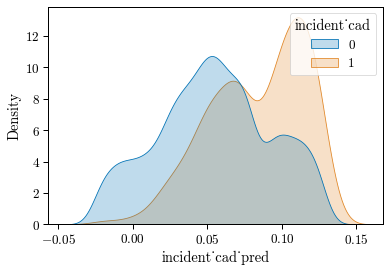

In [54]:
sns.kdeplot(
    test_data, x="incident_cad_pred", hue="incident_cad", fill=True, common_norm=False
)